In [1]:
from utils import get_data, read_data, draw_histogram, draw_ratio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn import metrics
from sklearn.metrics import classification_report

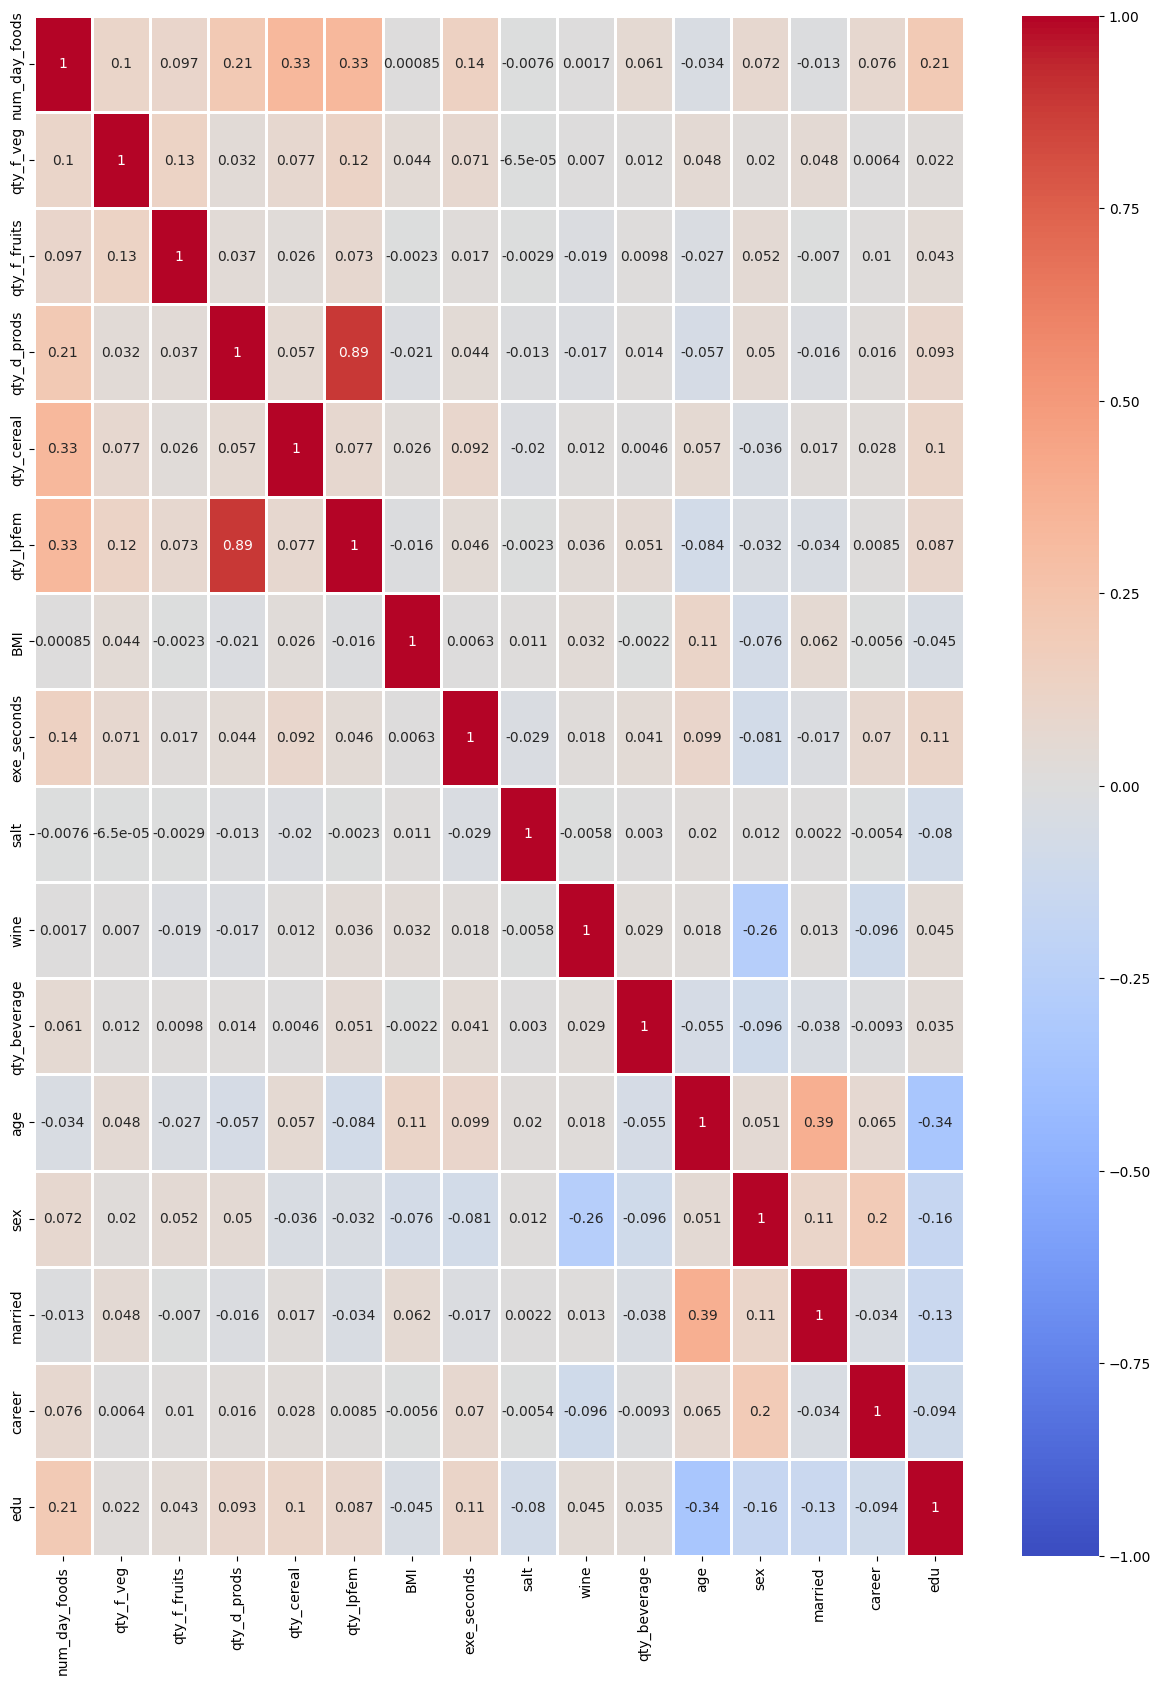

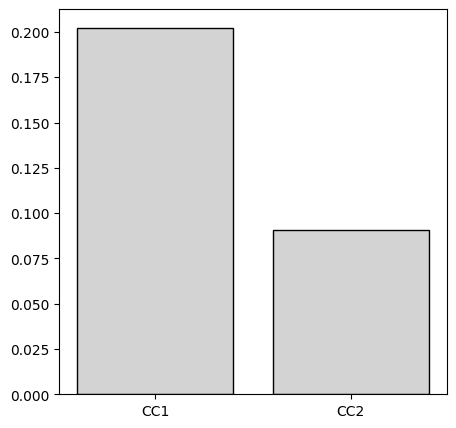

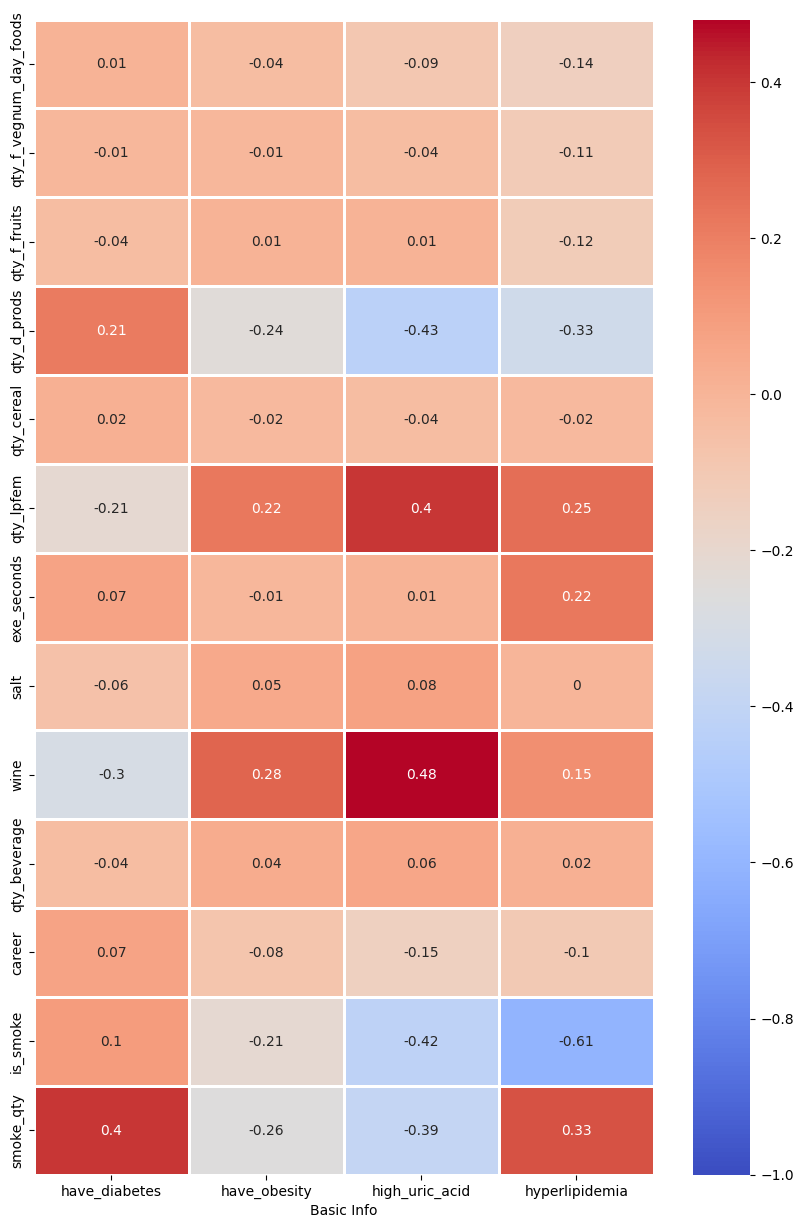

In [2]:
df = pd.read_csv("docs/processed_data.csv")
df = df.fillna(0)
df['low'] = (1-df.have_hypertension.astype(int))*(1-df.high_uric_acid.astype(int) )* (1 - df.hyperlipidemia.astype(int))
data = df.iloc[:,np.r_[12:28]]
X = df.iloc[:,np.r_[12:18,19:23, 26, 28:30]].astype('float')
Y = df.iloc[:,np.r_[31:35]]
scaler = StandardScaler() 
X_sc = scaler.fit_transform(X) #scale data
Y_sc = scaler.fit_transform(Y) 

corr_coeff = data.corr()
plt.figure(figsize = (15, 20))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.savefig("pics/corr_analysis.png")

n_comp = 2
cca = CCA(n_components=n_comp)
cca.fit(X_sc, Y_sc)
X_c, Y_c = cca.transform(X_sc, Y_sc)

comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(n_comp)]
plt.figure(figsize = (5, 5))
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')
plt.savefig("pics/bar.png")

coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [Y.columns])
coef_df.index = X.columns
plt.figure(figsize = (10, 15))
sns.heatmap(coef_df, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.xlabel("Basic Info")
plt.savefig("pics/CCA.png")

In [3]:
df=pd.read_csv("docs/processed_data.csv")
df = df.fillna(0)
# x = df.iloc[:,np.r_[12:18,19:23, 26, 28:30]].astype('float')
x = df.iloc[:,np.r_[17:18,19,28:30]].astype('float')
scaler = StandardScaler() 
X = scaler.fit_transform(X = x)
df['low'] = (1-df.have_hypertension.astype(int))*(1-df.high_uric_acid.astype(int) )* (1 - df.hyperlipidemia.astype(int))
y = df.iloc[:,np.r_[35]].astype('int')
x

,qty_lpfem,exe_seconds,is_smoke,smoke_qty
0,1.780952,0.0,3.0,0.0
1,9.071429,20.0,3.0,0.0
2,5.638095,0.0,1.0,20.0
3,12.857143,0.0,3.0,0.0
4,1.285714,0.0,1.0,10.0
...,...,...,...,...
7831,7.142857,35.0,3.0,0.0
7832,13.000000,60.0,3.0,0.0
7833,12.847619,0.0,1.0,20.0
7834,11.166667,30.0,3.0,0.0


d:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


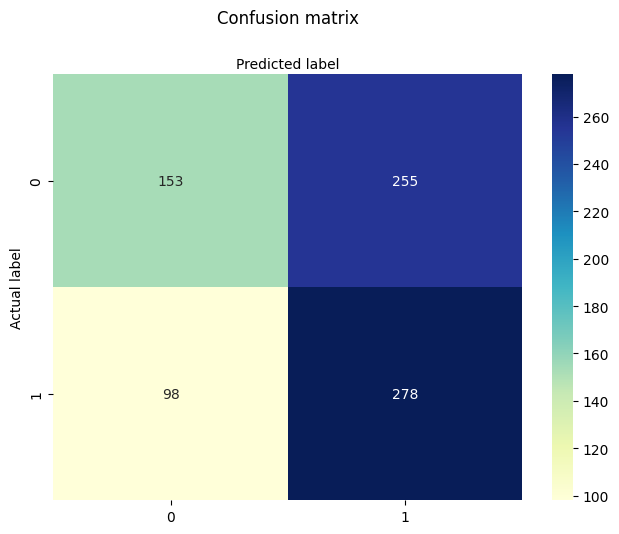

                  precision    recall  f1-score   support

without diabetes       0.61      0.38      0.46       408
   with diabetes       0.52      0.74      0.61       376

        accuracy                           0.55       784
       macro avg       0.57      0.56      0.54       784
    weighted avg       0.57      0.55      0.53       784



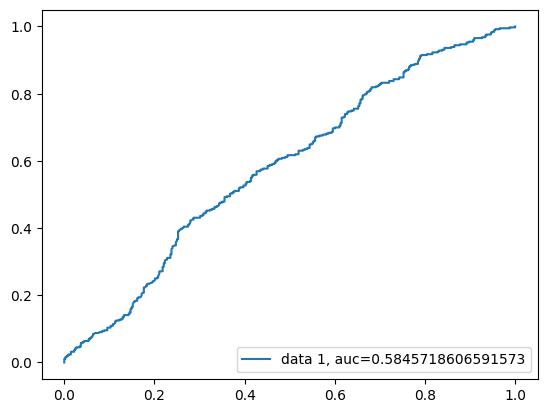

Text(0.5, 1.0, 'Variances Importances')

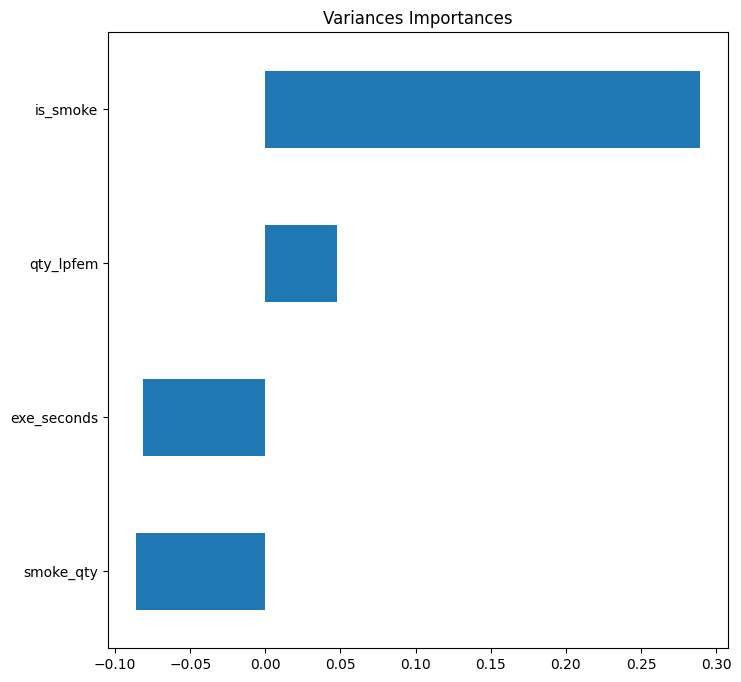

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)
logreg = LogisticRegression(random_state=15)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn import metrics

# cnf_matrix = metrics.confusion_matrix(y_test, yhat[:784].astype("int"))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# 1、简单排序,正负分开按顺序
coef_LR = pd.Series(logreg.coef_.flatten(),index = x.columns,name = 'Var')

plt.figure(figsize=(8,8))
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")